In [37]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import random

#used if i need wildcard in bs
import re

import time
import pprint

import matplotlib.pyplot as plt

In [2]:
client = MongoClient('localhost', 27017)
db = client['scraper']
whole_page_ratings = db['whole_page_rt']
rt_ratings = db['rt_ratings']

In [157]:
rt_pd = pd.DataFrame(list(rt_ratings.find()))

In [158]:
rt_pd.tail(100)

,_id,title,rotten_tomato_rating,audience_rating,director,writers,top_5_billed
1114,5f1884b8eec2a42d5d9cd2b8,Sicario: Day of the Soldado,62%,64%,[Stefano Sollima],[Taylor Sheridan],"[Benicio Del Toro , Josh Brolin , Isabela Merc..."
1115,5f1884c5eec2a42d5d9cd2b9,Poltergeist,85%,78%,[Tobe Hooper],"[Mark Victor, Michael Grais, Steven Spielberg]","[JoBeth Williams , Craig T. Nelson , Beatrice ..."
1116,5f1884cceec2a42d5d9cd2ba,Goosebumps 2: Haunted Halloween,47%,38%,[Ari Sandel],[Rob Lieber],"[Wendi McLendon-Covey , Madison Iseman , Jerem..."
1117,5f1884d3eec2a42d5d9cd2bb,12 Strong,51%,62%,[Nicolai Fuglsig],"[Peter Craig, Ted Tally]","[Chris Hemsworth , Michael Shannon , Michael P..."
1118,5f1884e1eec2a42d5d9cd2bc,Must Love Dogs,36%,50%,[Gary David Goldberg],[Gary David Goldberg],"[Diane Lane , John Cusack , Elizabeth Perkins ..."
...,...,...,...,...,...,...,...
1209,5f1889e6eec2a42d5d9cd317,Bogus,44%,44%,[Norman Jewison],[Alvin Sargent],"[Whoopi Goldberg , Gérard Depardieu , Haley Jo..."
1210,5f1889f2eec2a42d5d9cd318,Cradle Will Rock,64%,71%,[Tim Robbins],[Tim Robbins],"[Hank Azaria , Ruben Blades , Joan Cusack , Jo..."
1211,5f1889fbeec2a42d5d9cd319,The Good German,34%,33%,[Steven Soderbergh],"[Joseph Kanon, Paul Attanasio]","[George Clooney , Cate Blanchett , Tobey Magui..."
1212,5f188a10eec2a42d5d9cd31a,Apocalypse Now,98%,94%,[Francis Ford Coppola],"[John Milius, Francis Ford Coppola, Michael ...","[Martin Sheen , Marlon Brando , Robert Duvall ..."


In [39]:
budgets_pd = pd.read_csv('data/budgets_pd.csv')

In [40]:
budgets_pd.tail(10)

,_id,date,title,budget,domestic_gross,worldwide_gross
6033,5f17b5918fbba2e9aaf44118,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
6034,5f17b5918fbba2e9aaf44119,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
6035,5f17b5918fbba2e9aaf4411a,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
6036,5f17b5918fbba2e9aaf4411b,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
6037,5f17b5918fbba2e9aaf4411c,Unknown,The Mongol King,"$7,000",$900,$900
6038,5f17b5918fbba2e9aaf4411d,Unknown,Red 11,"$7,000",$0,$0
6039,5f17b5918fbba2e9aaf4411e,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6040,5f17b5918fbba2e9aaf4411f,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6041,5f17b5918fbba2e9aaf44120,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6042,5f17b5918fbba2e9aaf44121,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [ ]:
# graphs/plots
# 1 histogram of budgets
# budget vs critic rating
# budget vs audience rating
# maybe counts of oscar actors in movies >90% rated
# maybe counts of oscar directors in movies >90%
# maybe counts of oscar writers in movies >90%

In [160]:
merged_db = pd.merge(rt_pd, budgets_pd, on='title')

In [141]:
merged_db.head()

,_id_x,title,rotten_tomato_rating,audience_rating,director,writers,top_5_billed,_id_y,date,budget,domestic_gross,worldwide_gross
0,5f184b72eec2a42d5d9cce5e,Avengers: Endgame,94%,90%,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J...",5f17b39c8fbba2e9aaf4294b,"Apr 23, 2019","$400,000,000","$858,373,000","$2,797,800,564"
1,5f184b81eec2a42d5d9cce5f,Pirates of the Caribbean: On Stranger Tides,33%,54%,"[Dariusz Wolski, Rob Marshall]","[Rob Marshall, Terry Rossio, Ted Elliott]","[Johnny Depp , Penelope Cruz , Ian McShane , G...",5f17b39c8fbba2e9aaf4294c,"May 20, 2011","$379,000,000","$241,063,875","$1,045,663,875"
2,5f184b90eec2a42d5d9cce60,Avengers: Age of Ultron,76%,83%,[Joss Whedon],"[Stan Lee, Jack Kirby, Joss Whedon]","[Robert Downey Jr. , Chris Evans , Mark Ruffal...",5f17b39c8fbba2e9aaf4294d,"Apr 22, 2015","$365,000,000","$459,005,868","$1,396,099,202"
3,5f184ba0eec2a42d5d9cce61,Avengers: Infinity War,85%,91%,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Chris Hemsworth , Mark Ru...",5f17b39c8fbba2e9aaf4294f,"Apr 25, 2018","$300,000,000","$678,815,482","$2,048,359,754"
4,5f184bbeeec2a42d5d9cce62,Star Wars: The Rise of Skywalker,51%,86%,[J.J. Abrams],"[J.J. Abrams, Chris Terrio]","[Carrie Fisher , Mark Hamill , Adam Driver , D...",5f17b39c8fbba2e9aaf42953,"Dec 18, 2019","$275,000,000","$515,202,542","$1,073,469,600"


In [161]:
merged_df = merged_db[['title', 'date', 'rotten_tomato_rating', 'audience_rating', 'budget', 'domestic_gross', 'worldwide_gross', 'director', 'writers', 'top_5_billed']]

In [144]:
merged_df.tail()

,title,date,rotten_tomato_rating,audience_rating,budget,domestic_gross,worldwide_gross,director,writers,top_5_billed
407,Yogi Bear,"Dec 17, 2010",13%,34%,"$80,000,000","$100,246,011","$204,774,690",[Eric Brevig],"[Joshua Sternin, Jeffrey Ventimilia, Brad Co...","[Dan Aykroyd , Justin Timberlake , Anna Faris ..."
408,Cold Mountain,"Dec 25, 2003",70%,77%,"$80,000,000","$95,632,614","$165,173,909",[Anthony Minghella],[Anthony Minghella],"[Nicole Kidman , Jude Law , Renée Zellweger , ..."
409,The Book of Eli,"Jan 15, 2010",47%,64%,"$80,000,000","$94,835,059","$158,750,817","[Albert Hughes, Allen Hughes]","[Anthony Peckham, Gary Whitta]","[Denzel Washington , Gary Oldman , Mila Kunis ..."
410,Flubber,"Nov 26, 1997",24%,33%,"$80,000,000","$92,993,801","$177,993,801",[Les Mayfield],"[Bill Walsh, John Hughes]","[Robin Williams , Marcia Gay Harden , Christop..."
411,Space Jam,"Nov 15, 1996",43%,63%,"$80,000,000","$90,463,534","$250,180,384",[Joe Pytka],"[Leo Benvenuti, Steve Rudnick, Timothy Harri...","[Michael Jordan , Charles Barkley , Patrick Ew..."


In [71]:
merged_df.drop_duplicates(subset="title", inplace=True)

/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 0 to 1247
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 1248 non-null   object
 1   date                  1248 non-null   object
 2   rotten_tomato_rating  1248 non-null   object
 3   audience_rating       1248 non-null   object
 4   budget                1248 non-null   object
 5   domestic_gross        1248 non-null   object
 6   worldwide_gross       1248 non-null   object
 7   director              1248 non-null   object
 8   writers               1248 non-null   object
 9   top_5_billed          1248 non-null   object
dtypes: object(10)
memory usage: 107.2+ KB


In [54]:
convert_dict = {'rotten_tomato_rating':int, 'audience_rating':int, 'budget':int, 'domestic_gross':int, 'worldwide_gross':int}

In [163]:
budgets = budgets_pd.budget.str.replace('$','')
domestic = budgets_pd.domestic_gross.str.replace('$','')
worldwide = budgets_pd.worldwide_gross.str.replace('$','')
rt_rating = merged_df.rotten_tomato_rating.str.replace('%','')
aud_rating = merged_df.audience_rating.str.replace('%','')

In [164]:
rt = rt_rating[::-1]

In [75]:
budgets

0        400,000,000
1        379,000,000
2        365,000,000
3        306,000,000
4        300,000,000
            ...     
6038           7,000
6039           6,000
6040           5,000
6041           1,400
6042           1,100
Name: budget, Length: 6043, dtype: object

In [174]:
b = budgets[:1248]
b = b[::-1]

In [91]:
b.max()

'\xa0400,000,000'

(array([236., 154., 136.,  76.,  95.,  91.,  28.,  67.,  35.,  11.,  43.,
         26.,  31.,   9.,  46.,  19.,   8.,  32.,  15.,  10.,   9.,  28.,
          6.,   3.,   3.,   8.,   2.,   0.,   6.,   1.,   4.,   0.,   2.,
          0.,   0.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   1.]),
 array([5.00e+07, 5.70e+07, 6.40e+07, 7.10e+07, 7.80e+07, 8.50e+07,
        9.20e+07, 9.90e+07, 1.06e+08, 1.13e+08, 1.20e+08, 1.27e+08,
        1.34e+08, 1.41e+08, 1.48e+08, 1.55e+08, 1.62e+08, 1.69e+08,
        1.76e+08, 1.83e+08, 1.90e+08, 1.97e+08, 2.04e+08, 2.11e+08,
        2.18e+08, 2.25e+08, 2.32e+08, 2.39e+08, 2.46e+08, 2.53e+08,
        2.60e+08, 2.67e+08, 2.74e+08, 2.81e+08, 2.88e+08, 2.95e+08,
        3.02e+08, 3.09e+08, 3.16e+08, 3.23e+08, 3.30e+08, 3.37e+08,
        3.44e+08, 3.51e+08, 3.58e+08, 3.65e+08, 3.72e+08, 3.79e+08,
        3.86e+08, 3.93e+08, 4.00e+08]),
 <a list of 50 Patch objects>)

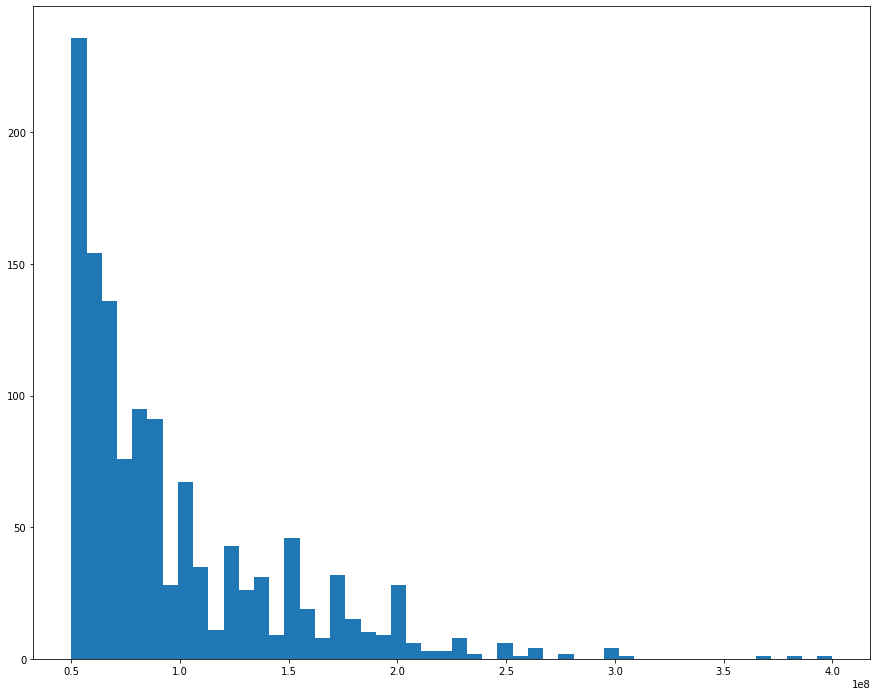

In [176]:
#budgets distribution
x_tix = range(200000,400000,50000)
# print(x_tix)
fig, ax = plt.subplots(figsize =(15,12))
ax.hist(blist, 50)
# ax.set_xticks(x_tix)

In [175]:
_ = b.tolist()
blist = []
for num in _:
    num = num.replace('\xa0','')
    num = num.replace(',', '')
    blist.append(int(num))
print(blist)

[50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000, 50000000,

In [172]:
_ = rt_rating.tolist()
print(_)
rtlist = []
for num in _:
#     num = num.replace('\xa0','')
#     num = num.replace(',', '')
     rtlist.append(int(num))
print(rtlist)

['94', '33', '76', '85', '51', '70', '52', '28', '93', '93', '93', '93', '89', '91', '83', '74', '59', '67', '82', '75', '87', '30', '65', '31', '73', '34', '15', '70', '20', '18', '57', '84', '84', '84', '42', '89', '94', '84', '94', '97', '98', '79', '85', '92', '64', '80', '57', '90', '51', '39', '40', '36', '33', '26', '37', '23', '86', '86', '86', '86', '35', '52', '82', '84', '66', '76', '94', '94', '78', '75', '86', '40', '88', '70', '57', '57', '93', '53', '74', '95', '18', '36', '93', '48', '27', '47', '46', '91', '78', '92', '98', '88', '73', '70', '34', '17', '23', '46', '14', '31', '47', '91', '73', '90', '90', '49', '69', '24', '98', '83', '61', '58', '89', '99', '87', '72', '30', '44', '91', '66', '41', '87', '70', '16', '16', '16', '16', '86', '33', '28', '96', '83', '27', '43', '16', '94', '77', '82', '56', '98', '78', '88', '73', '68', '41', '83', '96', '66', '84', '77', '64', '97', '35', '72', '37', '54', '50', '89', '71', '36', '52', '37', '73', '91', '89', '74', '97

In [177]:
print(len(blist))
print(len(rtlist))

1248
1248


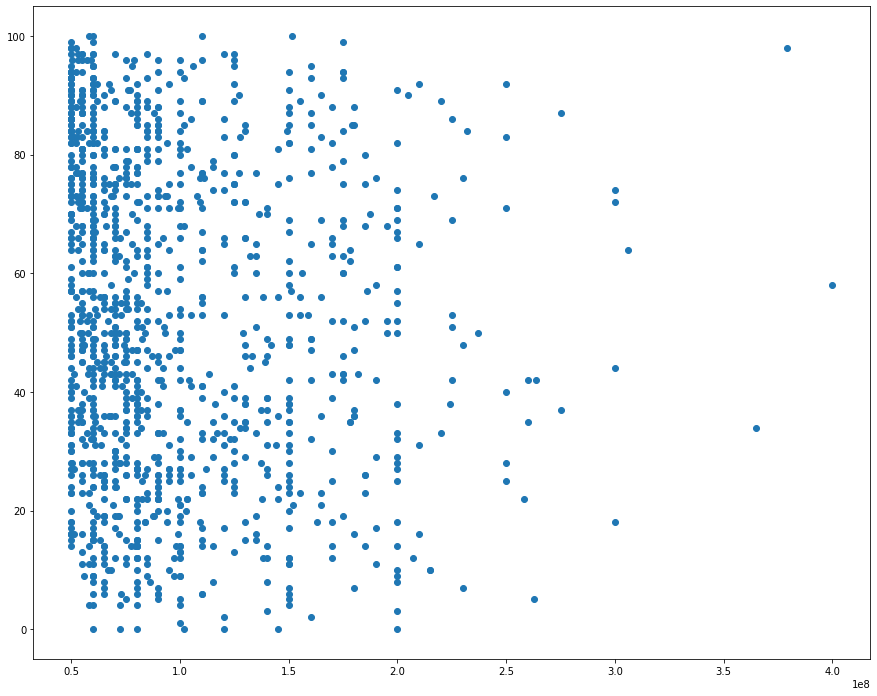

In [178]:

fig1, ax1 = plt.subplots(figsize=(15,12))
y =  range(0,100,5)
ax1.scatter(blist, rtlist)
# ax1.set_ylim([0,100])
# ax1.set_xlim([0, 100])